In [29]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv("CAR details v3.csv")

In [31]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


## DATA VISUALIZATION
#### Number of Vehicles vs Year, Seats, Fuel Type

Number of cars available from the model year 2017 is maximum.


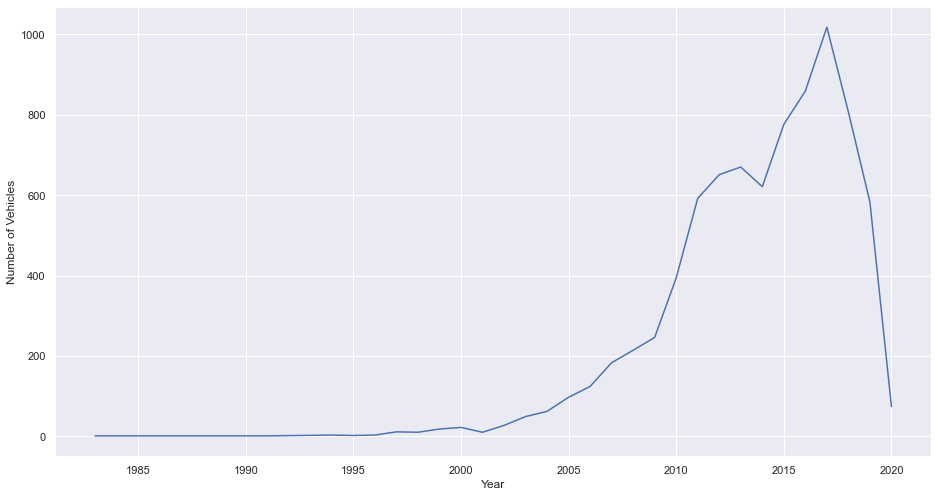

In [32]:
plt.plot(data.groupby('year').size())
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
print ("Number of cars available from the model year " +str(data['year'][max(data.groupby('year').size())])+" is maximum.")

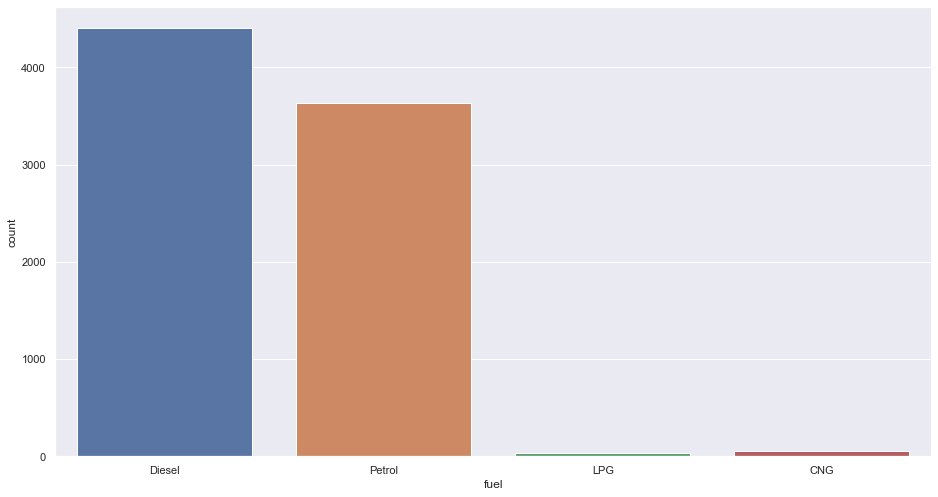

In [33]:
sns.countplot(x='fuel',data = data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

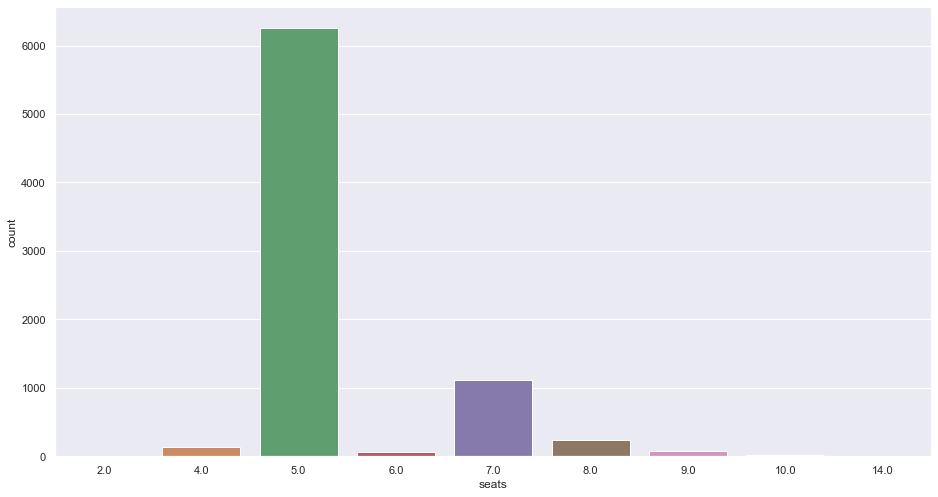

In [34]:
sns.countplot(x='seats',data = data)
plt.show

## Data Cleaning
#### Deleting torque and max power as they have too much randomness

In [35]:
data=data.drop(columns = ['torque','max_power'])

<AxesSubplot:xlabel='year', ylabel='selling_price'>

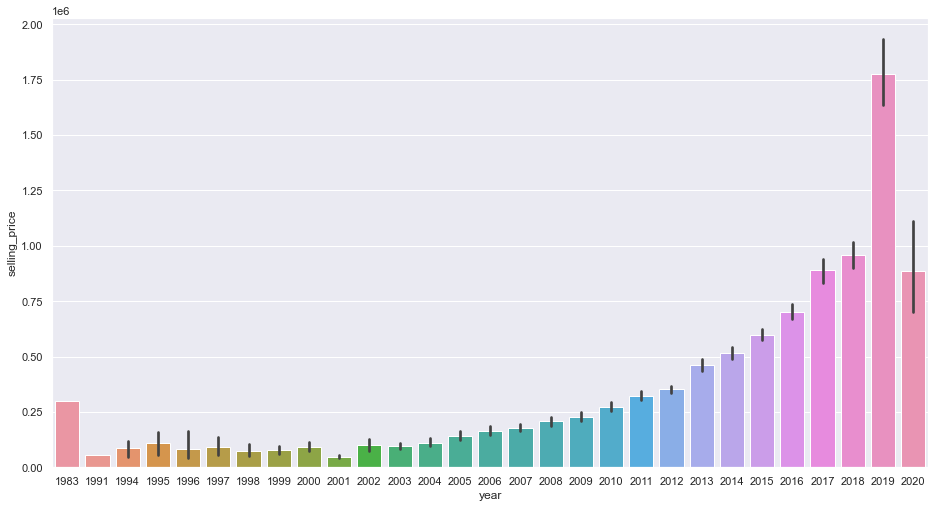

In [36]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x=data['year'],y=data['selling_price'])

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

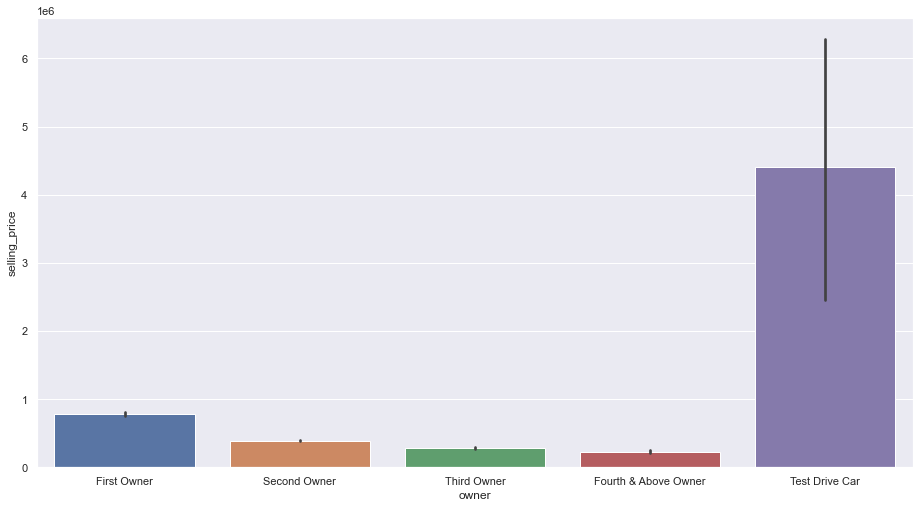

In [37]:
sns.barplot(x=data['owner'],y=data['selling_price'])

In [38]:
data.corr()


,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,-0.009144
selling_price,0.414092,1.000000,-0.225534,0.041358
km_driven,-0.418006,-0.225534,1.000000,0.227336
seats,-0.009144,0.041358,0.227336,1.000000


# DATA MANIPULATION
#### Converting Strings to Numerical data so that we can process the information

In [39]:
data.head(15)
data =data.dropna(subset = ['year','selling_price','km_driven','fuel','seller_type','transmission','owner','mileage','engine','seats'])

In [40]:
data.isnull().values.any()
data.isnull().sum().sum()

0

In [41]:
data=data.drop(columns ='name')

In [42]:
data['year']= np.where(data['year'].between(1984,2001),1990,data['year'])
data['year']= np.where(data['year'].between(2002,2010),2005,data['year'])
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,2005,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,2005,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,2005,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,5.0
8124,2005,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0
8125,2005,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,5.0


In [43]:
data['seller_type'].replace({'Dealer':0, 'Individual':1}, inplace=True)
data['transmission'].replace({'Automatic':1, 'Manual':1}, inplace=True)
data['owner'].replace({'First Owner':1, 'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}, inplace=True)
data=data.drop(columns=['seller_type'])

In [44]:
data["mileage"] = data["mileage"].str.replace(" kmpl", "")
data["mileage"] = data["mileage"].str.replace(" km/kg", "")
data['mileage']=data['mileage'].astype(float)



In [45]:
data['engine'] = data['engine'].str.replace(" CC","")
data['engine']= data['engine'].astype(float)

In [46]:
data['fuel'].replace({'Diesel':1, 'Petrol':2, 'CNG':3, 'LPG':4}, inplace=True)


In [47]:
data

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,seats
0,2014,450000,145500,1,1,1,23.40,1248.0,5.0
1,2014,370000,120000,1,1,2,21.14,1498.0,5.0
2,2005,158000,140000,2,1,3,17.70,1497.0,5.0
3,2005,225000,127000,1,1,1,23.00,1396.0,5.0
4,2005,130000,120000,2,1,1,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,2,1,1,18.50,1197.0,5.0
8124,2005,135000,119000,1,1,4,16.80,1493.0,5.0
8125,2005,382000,120000,1,1,1,19.30,1248.0,5.0
8126,2013,290000,25000,1,1,1,23.57,1396.0,5.0


# TRAINING THE MODEL

In [48]:
y = data['selling_price']
x = data.drop(columns=['selling_price'])


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5534, 8), (2373, 8), (5534,), (2373,))

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_regressor=GradientBoostingRegressor()
gradient_boost_regressor.fit(x_train,y_train)

GradientBoostingRegressor()

In [51]:
train_acc=gradient_boost_regressor.score(x_train,y_train)
test_acc=gradient_boost_regressor.score(x_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')


Training Accuracy:  94.67 %
Testing Accuracy:  93.46 %


In [52]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
train_acc=random_forest_regressor.score(x_train,y_train)
test_acc=random_forest_regressor.score(x_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  98.88 %
Testing Accuracy:  95.75 %


In [54]:
from sklearn.gaussian_process import GaussianProcessRegressor
gaussian_process_regressor=GaussianProcessRegressor()
gaussian_process_regressor.fit(x_train,y_train)

GaussianProcessRegressor()

In [55]:
train_acc=gaussian_process_regressor.score(x_train,y_train)
test_acc=gaussian_process_regressor.score(x_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  99.95 %
Testing Accuracy:  52.65 %


In [56]:
features = np.array([[2005, 12000, 1, 2,4,17.0,1400.0,5.0]])
random_forest_regressor.predict(features)

C:\Users\Anubhav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([255802.59])

In [57]:
import pickle
filename='model.sav'
pickle.dump(random_forest_regressor, open(filename, 'wb'))

In [59]:
loaded_model = pickle.load(open(filename, 'rb'))



0.9575268740279903
